# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** A. Agim Awaluddin
- **Email:** andiagym7@student.uns.ac.id
- **ID Dicoding:** andiagim

## Menentukan Pertanyaan Bisnis

Analisis ini akan fokus pada data Bike Sharing Dataset. Pertanyaan bisnis yang akan dijawab adalah

1. Apakah jumlah penyewaan sepeda naik turun mengikuti pergantian musim?
2. Adakah pengaruh dari kondisi lingkungan sekitar terhadap kepopuleran layanan penyewaan sepeda?
3. Bagaimana besar perbedaan jumlah penyewaan sepeda di hari libur dan hari biasa?

## Import Semua Packages/Library yang Digunakan

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
# Data pada day_df
day_df = pd.read_csv("data/day.csv")
day_df.head()

In [ ]:
# Data pada hour_df
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

**Insight:**
- Langkah awal dalam analisis ini adalah dengan mengimpor library pandas. Library ini merupakan salah satu alat yang paling populer dalam bahasa Python untuk manipulasi dan analisis data.
- Selanjutnya, data dalam format CSV yaitu *day* dan *hour* dibaca ke dalam program menggunakan fungsi read_csv().

### Assessing Data

In [ ]:
print(day_df.head())
day_df.info()
day_df.isna().sum()
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()


In [ ]:
print(hour_df.head())
hour_df.info()
hour_df.isna().sum()
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()


**Insight:**

Proses Assessing Data akan memastikan kualitas data yang akan kita gunakan. Proses ini mencakup pemeriksaan menyeluruh terhadap data untuk mendeteksi potensi masalah.
- Setiap data akan di cek dengan memeriksa tipe data, *missing value*, duplikasi data, dan memeriksa parameter statistiknya.
- Berdasarkan hasil pemeriksaan menyeluruh terhadap data, dapat disimpulkan bahwa **Day** terdapat kesalahan tipe data untuk kolom dteday dan **Hour** terdapat kesalahan tipe data untuk kolom dteday.



### Cleaning Data

In [ ]:
# The process is carried out on the dteday column, 
# which has different data types
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])
  hour_df[column] = pd.to_datetime(hour_df[column])
  
day_df.info()
hour_df.info()

**Insight:**

Pada tahap cleaning, data akan dibersihkan berbagai masalah yang telah teridentifikasi dalam proses assessing data.
- Pada data *day* dan *hour* dilakukan perubahan tipe data pada kolom **dteday** yang tadinya bertipe *object* menjadi tipe data tanggal (datetime64). Proses ini akan menggunakan fungsi to_datetime() yang disediakan oleh library Pandas. Setelah perubahan dilakukan, kemudian memverifikasi kembali tipe data kedua kolom tersebut menggunakan metode info() untuk memastikan semuanya sudah benar.

## Exploratory Data Analysis (EDA)

### Explore day_df

In [61]:
# viewing the summary of statistical parameters from the day_df data 
# using the describe method().
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [43]:
# Analyzing rental trends based on seasons
day_df.groupby("season")["cnt"].sum().nlargest(10).reset_index()

,season,cnt
0,3,1061129
1,2,918589
2,4,841613
3,1,471348


In [77]:
# Analyzing the weather situation and calculating the average bike rentals.
weather_rentals = day_df.groupby("weathersit")["cnt"].mean()

# Analyzing the days of the week and calculating the average bike rentals.
weekday_rentals = day_df.groupby("weekday")["cnt"].mean()

# Analyzing holidays and calculating the average bike rentals.
holiday_rentals = day_df.groupby("holiday")["cnt"].mean()

print("\nAverage by weather situation:")
print(weather_rentals)

print("\nAverage by weekday:")
print(weekday_rentals)

print("\nAverage on holidays vs. non-holidays:")
print(holiday_rentals)


Average by weather situation:
weathersit
1    4876.786177
2    4035.862348
3    1803.285714
Name: cnt, dtype: float64

Average by weekday:
weekday
0    4228.828571
1    4338.123810
2    4510.663462
3    4548.538462
4    4667.259615
5    4690.288462
6    4550.542857
Name: cnt, dtype: float64

Average on holidays vs. non-holidays:
holiday
0    4527.104225
1    3735.000000
Name: cnt, dtype: float64


### Explore hour_df

In [ ]:
# viewing the summary of statistical parameters from the hour_df 
# data using the describe method().
hour_df.describe(include="all")

In [ ]:
# Load the data
hour_df = pd.read_csv("data/hour.csv")

# Analisis pengaruh faktor lingkungan terhadap penyewaan sepeda
# Hubungan antara kondisi cuaca dan jumlah penyewaan
print("\nAverage by weather condition:")
print(hour_df.groupby("weathersit")["cnt"].mean())

# Korelasi antara suhu dan jumlah penyewaan
print("\nThe correlation between temperature and the number of rentals:")
print(hour_df[["temp", "cnt"]].corr())

# Korelasi antara kecepatan angin dan jumlah penyewaan
print("\nThe correlation between wind speed and the number of rentals:")
print(hour_df[["windspeed", "cnt"]].corr())

# Korelasi antara kelembaban dan jumlah penyewaan
print("\nThe correlation between humidity and the number of rentals:")
print(hour_df[["hum", "cnt"]].corr())


**Insight:**

**Day_df**

Dari informasi diperoleh analisis statistik menunjukkan bahwa:
- Terdapat total 731 pelanggan yang telah menggunakan layanan pada keempat musim (season 1-4). Setelah melihat jumlah tren penyewaan berdasarkan musim, season 3 dan 2 dengan jumlah terbanyak.
- Penyewaan sepeda paling tinggi pada kondisi cuaca cerah
- Jumlah penyewaan sepeda cenderung meningkat dari awal minggu hingga pertengahan minggu, kemudian sedikit menurun di akhir pekan.
- Jumlah penyewaan sepeda pada hari libur cenderung lebih rendah dibandingkan hari biasa. Ini bisa jadi karena banyak orang memilih untuk beraktivitas di dalam ruangan atau melakukan kegiatan lain selain bersepeda pada hari libur.

**Hour_df**

Dari informasi diperoleh analisis statistik menunjukkan bahwa:
- Kondisi cuaca 1 memiliki pengaruh positif terhadap penyewaan sepeda.
- Suhu yang lebih tinggi cenderung meningkatkan jumlah penyewaan, tetapi pengaruhnya tidak terlalu besar.
- Kecepatan angin hampir tidak berpengaruh pada penyewaan sepeda.
- Kelembaban yang tinggi cenderung mengurangi jumlah penyewaan, tetapi pengaruhnya juga tidak terlalu besar.


## Visualization & Explanatory Analysis

### Pertanyaan 1:

**Apakah jumlah penyewaan sepeda naik turun mengikuti pergantian musim?** 

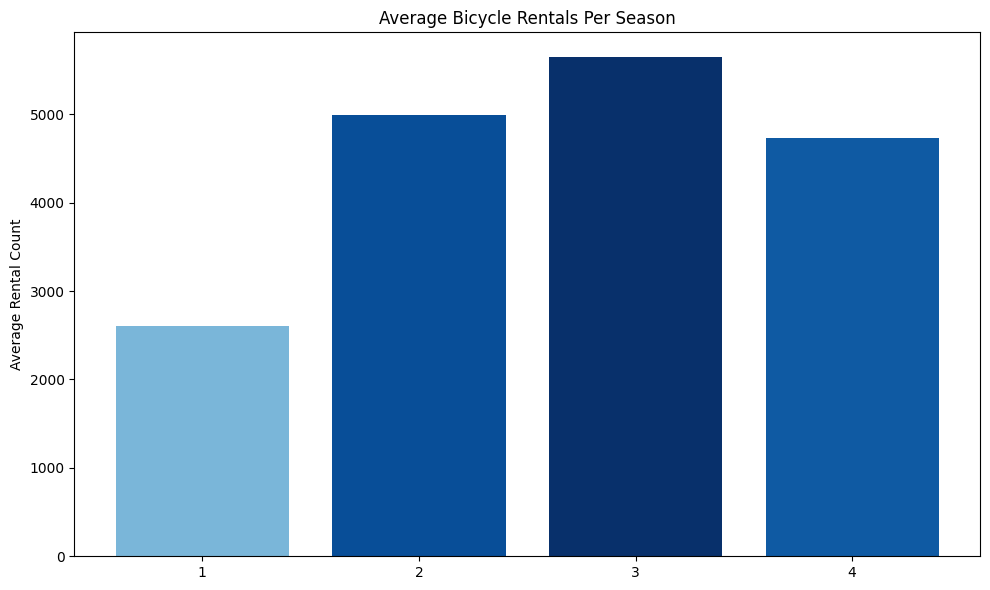

In [98]:
season_averages = day_df.groupby("season")["cnt"].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(season_averages['season'], season_averages['cnt'], color=plt.cm.Blues(season_averages['cnt'] / season_averages['cnt'].max()))

plt.ylabel("Average Rental Count")
plt.title("Average Bicycle Rentals Per Season")
plt.xticks(season_averages['season'])
plt.tight_layout()

# Show the plot
plt.show()

**Insight:**

Berdasarkan gambar di atas diperoleh:
- Disetiap pergantian musim terdapat perbedaan jumlah penyewaan sepeda. Musim 1-3 mengalami kenaikan dan di musim 4 mengalami penurunan 
- Jumlah terbanyak di musim 3, sedangkan yang paling sedikit adalah musim 1.

### Pertanyaan 2:

**Adakah pengaruh dari kondisi lingkungan sekitar terhadap kepopuleran layanan penyewaan sepeda?**


#### Weather

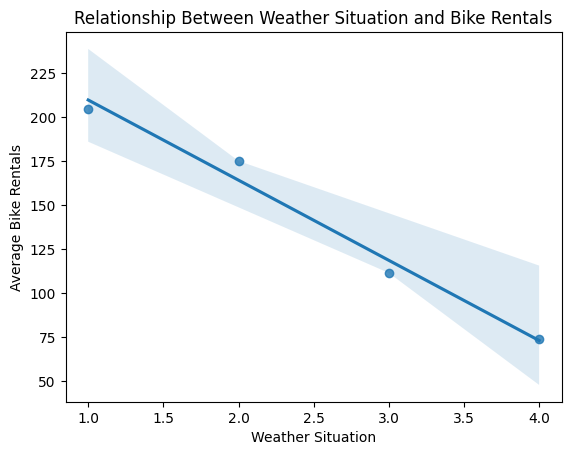

In [114]:
average_cnt_by_weathersit = hour_df.groupby("weathersit")["cnt"].mean()

sns.regplot(x=average_cnt_by_weathersit.index, y=average_cnt_by_weathersit.values)

plt.xlabel("Weather Situation")
plt.ylabel("Average Bike Rentals")
plt.title("Relationship Between Weather Situation and Bike Rentals")

# Show the plot
plt.show()

#### Temperature

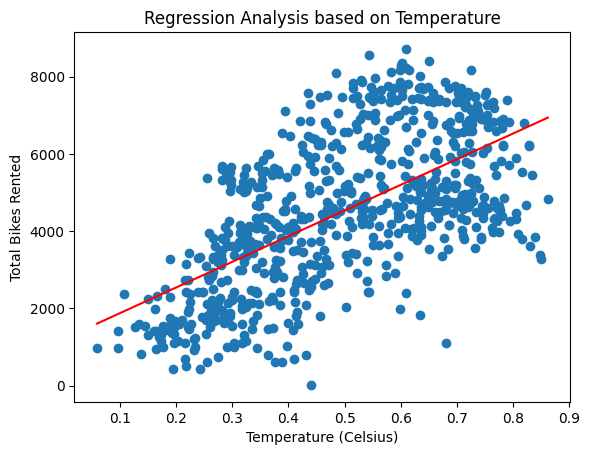

In [72]:
plt.scatter(day_df["temp"], day_df["cnt"])

slope, intercept = np.polyfit(day_df["temp"], day_df["cnt"], 1)
x = np.linspace(day_df["temp"].min(), day_df["temp"].max(), 100)
y = slope * x + intercept

plt.plot(x, y, color='red')

plt.title("Regression Analysis based on Temperature")
plt.xlabel("Temperature (Celsius)")
plt.ylabel("Total Bikes Rented")

plt.show()

#### Perceived Temperature

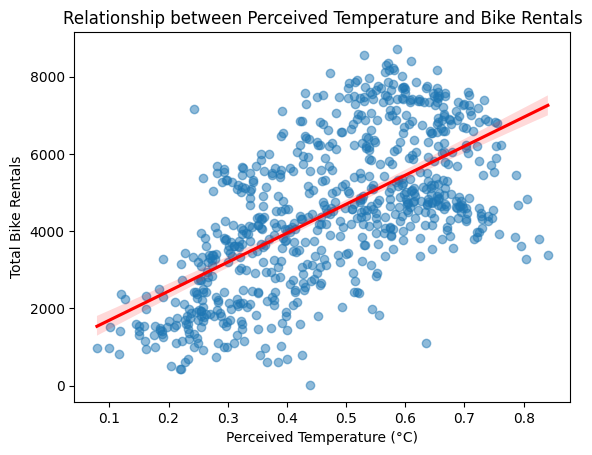

In [76]:
sns.regplot(data=day_df, x="atemp", y="cnt", 
            scatter_kws={'alpha':0.5}, line_kws={'color': 'red', 'label': 'Regresi Linear'})

plt.title("Relationship between Perceived Temperature and Bike Rentals")
plt.xlabel("Perceived Temperature (°C)")
plt.ylabel("Total Bike Rentals")

plt.show()

#### Humidity

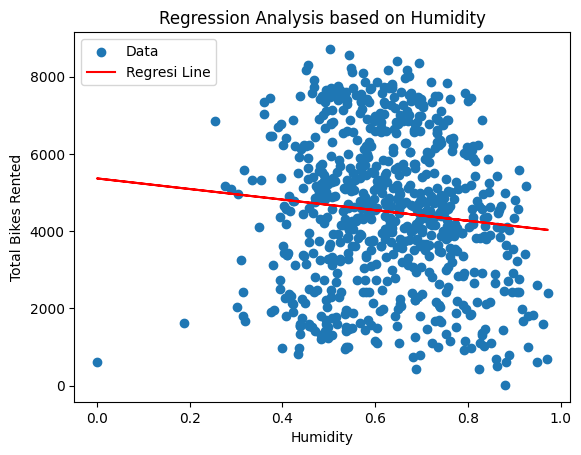

In [74]:
x = day_df['hum']
y = day_df['cnt']

slope, intercept = np.polyfit(x, y, 1)

plt.scatter(x, y, label='Data')
plt.plot(x, slope*x + intercept, color='red', label='Regresi Line')
plt.title('Regression Analysis based on Humidity')
plt.xlabel('Humidity')
plt.ylabel('Total Bikes Rented')
plt.legend()

plt.show()

#### Wind Speed

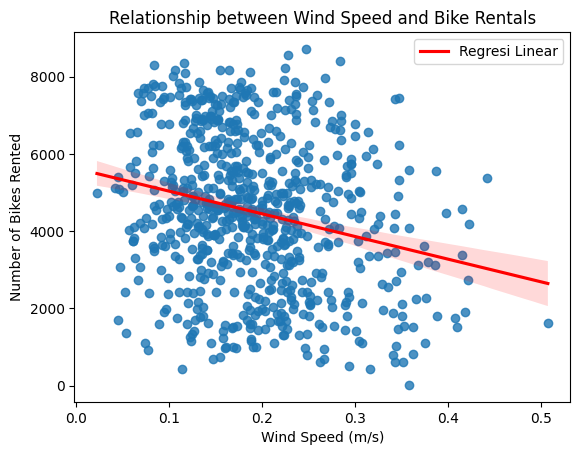

In [75]:
sns.regplot(data=day_df, x='windspeed', y='cnt',
            line_kws={'color': 'red', 'label': 'Regresi Linear'})
plt.title('Relationship between Wind Speed and Bike Rentals')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Number of Bikes Rented')
plt.legend()

plt.show()


**Insight:**

Berdasarakan beberapa gambar di atas, diperoleh:
- Kondisi lingkungan seperti cuaca, temperatur, kelembapan, dan kecepatan angin turut memengaruhi tren dari penyewaan sepeda. Masing-masing dari kondisi tersebut memiliki nilai yang berbeda.

### Pertanyaan 3:

**Bagaimana besar perbedaan jumlah penyewaan sepeda di hari libur dan hari biasa?**

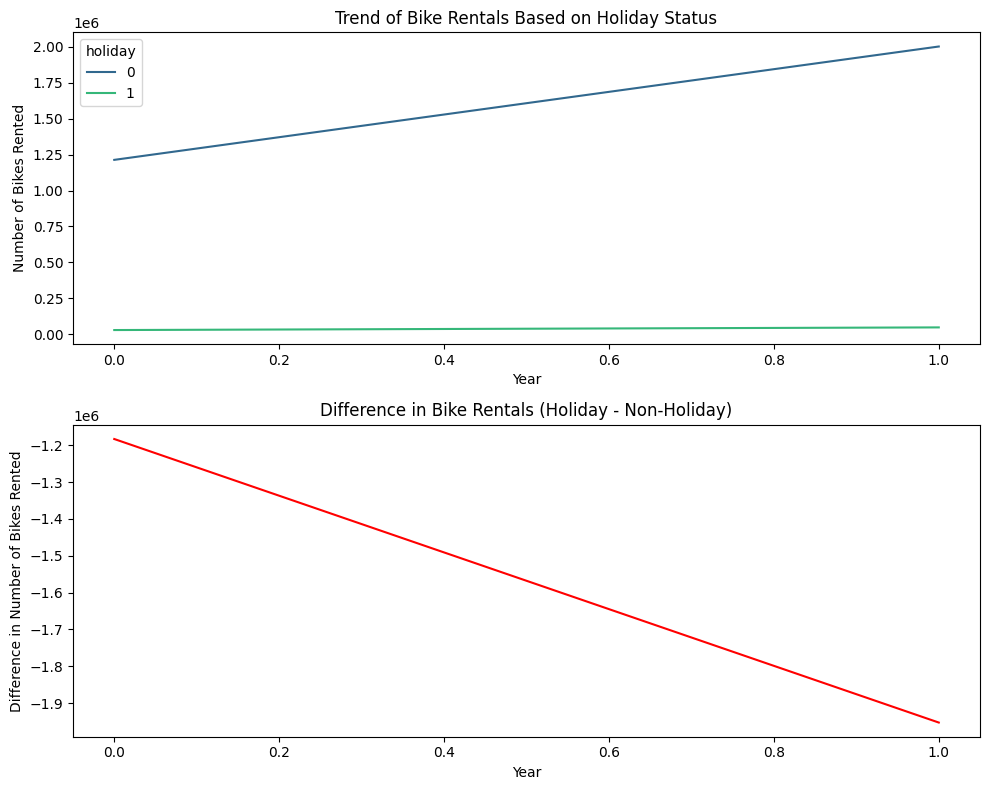

In [126]:
holiday_counts = day_df.groupby(by=["holiday", "yr"]).agg({"cnt": "sum"}).reset_index()

holiday_pivot = holiday_counts.pivot_table(index="yr", columns="holiday", values="cnt")

holiday_pivot["difference"] = holiday_pivot[1] - holiday_pivot[0]

fig, axs = plt.subplots(2, 1, figsize=(10, 8))

sns.lineplot(data=holiday_counts, x="yr", y="cnt", hue="holiday", palette="viridis", ax=axs[0])
axs[0].set_title("Trend of Bike Rentals Based on Holiday Status")
axs[0].set_xlabel("Year")
axs[0].set_ylabel("Number of Bikes Rented")

sns.lineplot(data=holiday_pivot.reset_index(), x="yr", y="difference", color='red', ax=axs[1])
axs[1].set_title("Difference in Bike Rentals (Holiday - Non-Holiday)")
axs[1].set_xlabel("Year")
axs[1].set_ylabel("Difference in Number of Bikes Rented")

plt.tight_layout()
plt.show()

**Insight:**
- Garis yang cenderung menurun menunjukkan bahwa selisih antara hari libur dan hari biasa semakin melebar dari awal hingga akhir periode yang diamati. Artinya, perbedaan jumlah penyewaan antara kedua jenis hari tersebut semakin besar.

## Conclusion

1. Apakah jumlah penyewaan sepeda naik turun mengikuti pergantian musim?
    - Terdapat fluktuasi (tren naik/turun) disetiap pergantian musim terhadap jumlah penyewaan sepeda. Musim 1-3 mengalami kenaikan dan di musim 4 mengalami penurunan.
2. Adakah pengaruh dari kondisi lingkungan sekitar terhadap kepopuleran layanan penyewaan sepeda?
    - Kondisi lingkungan, seperti cuaca, memiliki pengaruh yang signifikan terhadap tren penyewaan sepeda Variabel-variabel seperti suhu, kelembapan, dan kecepatan angin memberikan kontribusi yang unik terhadap tren penyewaan.
3. Bagaimana besar perbedaan jumlah penyewaan sepeda di hari libur dan hari biasa?
    - tren dari selisih memiliki garis yang cenderung menurun menunjukkan bahwa selisih antara hari libur dan hari biasa semakin melebar dari awal hingga akhir periode yang diamati. Artinya, perbedaan jumlah penyewaan antara kedua jenis hari tersebut semakin besar.

### Export Dataset

In [136]:
day_df.to_csv("dashboard/main_data.csv", index=False)
hour_df.to_csv("dashboard/main_data0.csv", index=False)